<a href="https://colab.research.google.com/github/akshayrana30/kaggle-data-science/blob/master/TextEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [0]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])

In [0]:
data_np = np.load("./data_train.pkl", allow_pickle = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_np[0], data_np[1], test_size=0.20)

In [0]:
embeddings_train = embed(X_train)
embeddings_test = embed(X_test)


In [0]:
X_train = embeddings_train.numpy()
X_test = embeddings_test.numpy()

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import SGDClassifier

clg = SGDClassifier(loss="log")
clg.fit(X_train, y_train)
# y_pred = clg.predict(X_test)
# accuracy_score(y_pred, y_test)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = clg.predict(X_test)

In [31]:
accuracy_score(y_pred, y_test)

0.1997142857142857

In [0]:
# embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

embedding = "https://tfhub.dev/google/tf2-preview/nnlm-es-dim50-with-normalization/1"

hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=False )

In [0]:
# from sklearn.preprocessing import LabelEncoder
# lbe = LabelEncoder()
# lbe.fit(y_train)
# y_train = lbe.transform(y_train)
# y_test = lbe.transform(y_test)

train_dataset = tf.data.Dataset.from_tensor_slices((padded_docs_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((padded_docs_test, y_test))

In [0]:
embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = embed(["cat"])

In [139]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 50)                48832000  
_________________________________________________________________
dense_51 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_52 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_53 (Dense)             (None, 20)                620       
Total params: 48,835,890
Trainable params: 3,890
Non-trainable params: 48,832,000
_________________________________________________________________


Need to convert to 3d for lstm, so extracting weights from the layer.. and will use it in embedding layer



In [152]:
weights = hub_layer.get_weights()[0]
weights.shape

(976640, 50)

In [0]:
tokenizer.

In [181]:
[k:v for k in tokenizer.in]

TypeError: ignored

In [177]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000, oov_token='OOV_TOKEN')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
# one_hot_encoded_Y = to_categorical(vector_Y)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index


print(X_train[2])





[1794, 2553, 5, 82, 16, 307, 28, 6, 130, 3, 18593]


In [0]:
padded_docs_train = pad_sequences(X_train, maxlen=200, padding='post')
padded_docs_test = pad_sequences(X_test, maxlen=200, padding='post')

In [194]:
model = tf.keras.Sequential()
# model.add(hub_layer)
# model.add(tf.keras.layers.Embedding(weights.shape[0], weights.shape[1], weights=[weights]))
model.add(tf.keras.layers.Embedding(vocab_size, 100, input_length=200))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 200, 100)          7081900   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               84480     
_________________________________________________________________
dense_66 (Dense)             (None, 30)                3870      
_________________________________________________________________
dense_67 (Dense)             (None, 20)                620       
Total params: 7,170,870
Trainable params: 7,170,870
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_dataset.shuffle(10000).batch(128),
                    epochs=10,
                    validation_data=test_dataset.batch(128),
                    verbose=1)

Epoch 1/10
438/438 [==============================] - 439s 1s/step - loss: 2.6321 - sparse_categorical_accuracy: 0.1605 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/10
286/438 [==================>...........] - ETA: 2:22 - loss: 1.9940 - sparse_categorical_accuracy: 0.3472

In [119]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

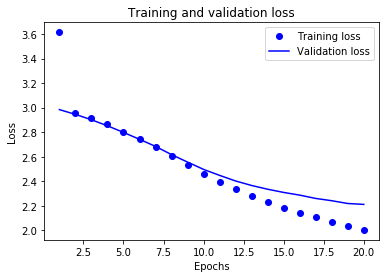

In [111]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['sparse_categorical_accuracy']
val_acc = history_dict['val_sparse_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [116]:
loss

[3.6140416434151788,
 2.9589370267050605,
 2.9149156382424493,
 2.8625779288155693,
 2.8041126232147215,
 2.7422285376957483,
 2.6769465381077358,
 2.6057833993094306,
 2.530729106085641,
 2.4601422170911516,
 2.391933229991368,
 2.333027000427246,
 2.278807938984462,
 2.2304238967895507,
 2.185239685331072,
 2.145258891241891,
 2.106986570903233,
 2.0707553482055663,
 2.037603917258126,
 2.003682823044913]

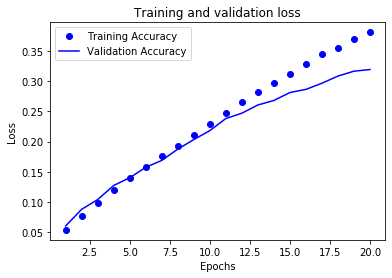

In [112]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['sparse_categorical_accuracy']
val_acc = history_dict['val_sparse_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [92]:
hub_layer(train_examples_batch[:3])

<tf.Tensor: id=36712, shape=(3, 20), dtype=float32, numpy=
array([[-0.22229461, -0.42916432,  0.29436302,  0.09194236, -0.7034013 ,
        -0.1901886 , -0.11568107,  0.2729968 ,  0.26288062,  0.20134993,
        -0.83761847,  0.60414404, -0.9240657 ,  0.00393114, -0.9336567 ,
         1.7986548 ,  1.0537531 , -0.59725803, -1.314109  ,  0.48715585],
       [ 0.71973515, -1.5690672 ,  2.6005182 ,  1.5375804 , -3.0475962 ,
        -1.5940319 , -0.42759824,  0.41191167,  0.80040985,  0.53082407,
        -0.09179005,  0.6399752 , -1.276149  ,  0.3304295 , -0.6884999 ,
        -0.15445505,  0.92919135, -0.4841512 , -0.5742273 , -0.5302603 ],
       [-0.05867215, -0.64040196,  0.8372087 ,  0.49190915, -1.3283617 ,
        -0.89039457, -0.80225223,  0.56662   , -0.20465149,  1.1194165 ,
        -0.42436174, -0.50600976,  0.5010443 ,  0.5542055 , -1.7319016 ,
        -0.22708881,  1.2521013 ,  0.60175776,  0.46372825, -0.45272866]],
      dtype=float32)>

In [96]:
train_examples_batch, train_labels_batch = next(iter(train_dataset.batch(10)))
train_examples_batch

<tf.Tensor: id=42117, shape=(10,), dtype=string, numpy=
array([b'Because he would be on the bench for the nets and a superstar in china',
       b'Film trailers have lines edited that may or may not be full text. Has always been that way ',
       b'Medical Marijuana and now this! Looks like I need to relocate. ',
       b'Prior to this, 2 people making burgers and 4 "serving." Now, 2 people making burgers and 4 people standing around.',
       b'Ok Go\'s "Here We Go Again" got a lot of traction when it came out.',
       b"lol are you talking about this\n\n&gt;Maria Menounos calls her brain tumor a 'gift' saying she needed to change her life as she and Megyn Kelly both break down in tears discussing her mother's cancer battle\n\nNot exactly world news is it? I'd have downvoted it too ;)",
       b'The stupid flat earth "theory",\nThe worst part is I\'ve figured out there are HUGE troll accounts made to trick and annoy people.\nMy rule of thumb is that if they have no person in the pro

In [0]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

(train_data, validation_data), test_data = tfds.load(
    name="imdb_reviews", 
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True)

In [0]:
next(iter(train_dataset.shuffle(10000).batch(512)))